In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify
from IPython.display import display, HTML

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()

In [11]:
loc = mp.open_package('http://library.metatab.org/cityiq.io-objects-san_diego-5.zip')
loc

# San Diego City IQ Assets and Locations
`cityiq.io-objects-san_diego-5` Last Update: 2019-06-04T23:09:02

_All assets types extracted form the San Diego City Iq system_


These datafile are extracts of the assets and locations from the San Diego
CityIQ system. Refer to the [CityIQ developer
documentation](https://ie-cities-docs.run.aws-usw02-pr.ice.predix.io/#c_overview
 _of_general_apis.html) for details about these data records. The data are
extracted using the [cityiq Python package](https://pypi.org/project/cityiq/).
See the ExtractAssets.ipynb notebook for the extract process.

## Versions

1. Development version
2. Development version
3. First release
4. Added tract and community names
5. Rebuild with recent data, and broke out asset and location types


 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [assets](data/assets.csv)**. All assets
* ** [locations](data/locations.csv)**. All locations: walkways, traffic lanes and parking zones
* ** [walkways](data/walkways.csv)**. Walkways
* ** [traffic_lanes](data/traffic_lanes.csv)**. Traffic lanes
* ** [parking_zones](data/parking_zones.csv)**. Parking zones
* ** [cameras](data/cameras.csv)**. Cameras
* ** [mics](data/mics.csv)**. Microphones
* ** [nodes](data/nodes.csv)**. Nodes
* ** [em_sensors](data/em_sensors.csv)**. Electro-magnetic sensors
* ** [env_sensors](data/env_sensors.csv)**. Environmental sensors

## References
<ul><li> <strong>sdroads</string>, <em>metapack+http://library.metatab.org/sangis.org-roads-sandiego-1.zip#all_roads</em>. Roads in San Diego</li><li> <strong>tract_boundaries</string>, <em>metapack+http://library.metatab.org/sandiegodata.org-geography-2018.csv#tract_boundaries</em>. San Diego tracts and communities</li><li> <strong>sd_community_boundaries</string>, <em>metapack+http://library.metatab.org/sandiegodata.org-geography-2018.csv#sd_community_boundaries</em>. San Diego tracts and communities</li><ul>

In [14]:
display(loc.resource('parking_zones'))
pz = loc.resource('parking_zones').dataframe()
pz

Header,Type,Description
locationuid,string,
locationtype,string,
parentlocationuid,string,
community_name,string,Name of San Diego planning community where location is located
tract_geoid,string,Geoid of the tract where the location is located
roadsegid,integer,SANDAG road segment id. Links to the SANDAG roads data
speed,integer,Speed limit on the road segment
oneway,string,Is the road segment one way?
abloaddr,integer,Absolute lowest address on road segment
abhiaddr,integer,Absolute highest address on road segment


,locationuid,locationtype,parentlocationuid,community_name,tract_geoid,roadsegid,speed,oneway,abloaddr,abhiaddr,rd30full,geometry
0,03e23a6ace01fc14a86ab250ce65b682,PARKING_ZONE,03e23a6ace01fc14a86ab250ce65b682,Downtown,14000US06073005800,40053,20,T,1600,1699,KETTNER BLVD,POLYGON ((-117.1692215138037 32.72279861805261...
1,04snxj7ojr1djgmizovr,PARKING_ZONE,04snxj7ojr1djgmizovr,Pacific Beach,14000US06073007910,54752,20,B,800,830,REED AVE,POLYGON ((-117.2541798583198 32.79285099076618...
2,051zxsk4ofy6jl2daq51,PARKING_ZONE,051zxsk4ofy6jl2daq51,Downtown,14000US06073005300,2027,20,T,700,799,08TH AVE,POLYGON ((-117.1573513379163 32.71334498111509...
3,05yh4xfuhdvbjl5dc16y,PARKING_ZONE,05yh4xfuhdvbjl5dc16y,Downtown,14000US06073005400,528,20,B,400,499,02ND AVE,POLYGON ((-117.1627861992826 32.71031076045004...
4,06c474fb976e2f394b69309d41d19f7f,PARKING_ZONE,06c474fb976e2f394b69309d41d19f7f,Downtown,14000US06073005300,9022,20,T,300,399,ASH ST,POLYGON ((-117.1612501465878 32.71981255555686...
...,...,...,...,...,...,...,...,...,...,...,...,...
1881,zxdkdyt65e9jj7dubh8,PARKING_ZONE,zxdkdyt65e9jj7dubh8,Downtown,14000US06073005400,9149,20,F,400,499,W ASH ST,POLYGON ((-117.1672791056275 32.71994066875191...
1882,zxpa17ginmjj7gu460,PARKING_ZONE,zxpa17ginmjj7gu460,Downtown,14000US06073005400,205236,20,B,1000,1199,KETTNER BLVD,POLYGON ((-117.1691083241984 32.71664370847171...
1883,zy5gjeld21ojl6nt6b5,PARKING_ZONE,zy5gjeld21ojl6nt6b5,Downtown,14000US06073005300,9997,20,T,700,799,B ST,"POLYGON ((-117.158189828312 32.71776776291993,..."
1884,zyyqxlafn2jinh978p,PARKING_ZONE,zyyqxlafn2jinh978p,Greater North Park,14000US06073004300,4120,35,B,2700,2799,30TH ST,POLYGON ((-117.1292701896728 32.73438139830906...


In [2]:

pkg = mp.open_package('http://library.metatab.org/sandiego.gov-cityiq_parking-2.zip')
pkg

# San Diego Parking Time Series
`sandiego.gov-cityiq_parking-2` Last Update: 2019-02-20T04:10:31

_15 minute interval parking utilization for 1600 parking zones in San Diego city._


This datasets is compiled from parking events scraped from the San Diego CityIQ
smart streetmap system, via the [cityiq Python
package](https://pypi.org/project/cityiq/). The dataset is compiled from PKIN
and PKOUT events between the dates of Sept 2018 and Feb 2019 for the whole SaN
Diego system.

The dataset is heavily processed to eliminate duplicate events because there
are many spurious events, but an excess of PKIN events. When computing the
number of cars parked in all parking zones, the excess of PKIN events results
in about 60,000 extra cars per month. These issues are explored in an [Jupyter
Notebook](https://github.com/sandiegodata/cityiq/blob/master/notebooks/CityIQ%20
Leaking%20PKIN%20Events.ipynb)

The records in this dataset referece parking zones. More information, including geographic positions, are avialble in the [CityIQ Objects dataset.](https://data.sandiegodata.org/dataset/sandiego-gov-cityiq_objects)

## Processing

These data were produced with these programs: 

	$ pip install cityiq
	$ ciq_config -w
	$ # Edit .cityiq-config.yaml with client-id and secret
	# Scrape PKIN and PKOUT from Sept 2018 to present
	$ $ ciq_events -s -e PKIN -e PKOUT -t 20190901
	# Split event dump in to event-location csv files
	$ ciq_events -S
	# Deduplicate and normalize
	$ ciq_events -n

The last step, deduplication and normalization, involves these steps: 

* Group events by event type, location and 1 second period and select only 1
  record from each group 
* Collect runs of a events of one type and select only
  the first record of the run, up to a run of 4 minutes long 
* For each location, compute the cumulative sum of in and outs ( calculating
  the number of cars in the zone ) then create a rolling 2-day average.
  Subtract off the average.

The third step is demonstrated in this image:


![rollnorm](http://ds.civicknowledge.org.s3.amazonaws.com/sandiego.gov/cityiq/rolling-renorm.png "Rolling Normlization")

The blue line is the original utilization for a single location, showing the
larger number of PKIN events than PKOUT events. The red line is the 2-day
rolling average, and the green line is after subtracting the 2-dat rolling
average.

In the final dataset, the data for the blue line is in the  ``cs`` column, which is created from the cumulative sum of the ``delta`` column. The green line is the data in the ``cs_norm`` column, which is differentiated to create the ``delta_norm``column. 

For most purpuses you should use ``cs_norm`` and ``delta_norm``.


 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [parking_events](http://ds.civicknowledge.org/sandiego.gov/cityiq/cityiq-PKIN_PKOUT-20180901-20190201.csv.zip)**. Parking events

## References
<ul><li> <strong><a href="http://ds.civicknowledge.org/sandiego.gov/cityiq/cityiq-PKIN_PKOUT-20180901-20190201.csv.zip">parking_events</a></strong>. Parking events</li><li> <strong>assets</string>, <em>metapack+http://library.metatab.org/sandiego.gov-cityiq_objects.csv#assets</em>. Data package with metadata about the parking zone locations.</li><li> <strong>locations</string>, <em>metapack+http://library.metatab.org/sandiego.gov-cityiq_objects.csv#locations</em>. Data package with metadata about the parking zone locations.</li><ul>

In [5]:
display(pkg.resource('parking_events'))
prk = pkg.resource('parking_events').dataframe()
prk.head()

Header,Type,Description
time,datetime,
locationuid,string,
delta,integer,Raw change from previous time period
cs,integer,Raw running total of vehicles per parking zone ( “cumulative sum”)
delta_norm,integer,Normalized change from previous period
cs_norm,integer,Normalized running total of vehicles per parking zone ( “cumulative sum”)


,time,locationUid,delta,cs,delta_norm,cs_norm
0,2018-09-01 12:30:00,v645089nhwojixbldr0,-1,-1,0,4
1,2018-09-01 12:45:00,v645089nhwojixbldr0,0,-1,0,4
2,2018-09-01 13:00:00,v645089nhwojixbldr0,0,-1,0,4
3,2018-09-01 13:15:00,v645089nhwojixbldr0,2,1,2,6
4,2018-09-01 13:30:00,v645089nhwojixbldr0,-2,-1,-2,4
...,...,...,...,...,...,...
16398913,2019-02-13 16:15:00,5mvb86fsnqtjiyofm4v,-1,838,0,0
16398914,2019-02-13 16:30:00,5mvb86fsnqtjiyofm4v,0,838,0,0
16398915,2019-02-13 16:45:00,5mvb86fsnqtjiyofm4v,0,838,0,0
16398916,2019-02-13 17:00:00,5mvb86fsnqtjiyofm4v,0,838,0,0


9477418

In [46]:
prk.rename(columns={'locationUid':'locationuid'}, inplace=True)
neighborhood = pz[pz.community_name == 'Downtown'].merge(prk, on='locationuid')

In [64]:
neighborhood['in'] = np.where(neighborhood.delta_norm > 0, neighborhood.delta_norm, 0)
neighborhood['out'] = np.where(neighborhood.delta_norm < 0, neighborhood.delta_norm, 0)
neighborhood[neighborhood.delta != 0].head().T

,170,173,201,207,294
locationuid,03e23a6ace01fc14a86ab250ce65b682,03e23a6ace01fc14a86ab250ce65b682,03e23a6ace01fc14a86ab250ce65b682,03e23a6ace01fc14a86ab250ce65b682,03e23a6ace01fc14a86ab250ce65b682
locationtype,PARKING_ZONE,PARKING_ZONE,PARKING_ZONE,PARKING_ZONE,PARKING_ZONE
parentlocationuid,03e23a6ace01fc14a86ab250ce65b682,03e23a6ace01fc14a86ab250ce65b682,03e23a6ace01fc14a86ab250ce65b682,03e23a6ace01fc14a86ab250ce65b682,03e23a6ace01fc14a86ab250ce65b682
community_name,Downtown,Downtown,Downtown,Downtown,Downtown
tract_geoid,14000US06073005800,14000US06073005800,14000US06073005800,14000US06073005800,14000US06073005800
roadsegid,40053,40053,40053,40053,40053
speed,20,20,20,20,20
oneway,T,T,T,T,T
abloaddr,1600,1600,1600,1600,1600
abhiaddr,1699,1699,1699,1699,1699


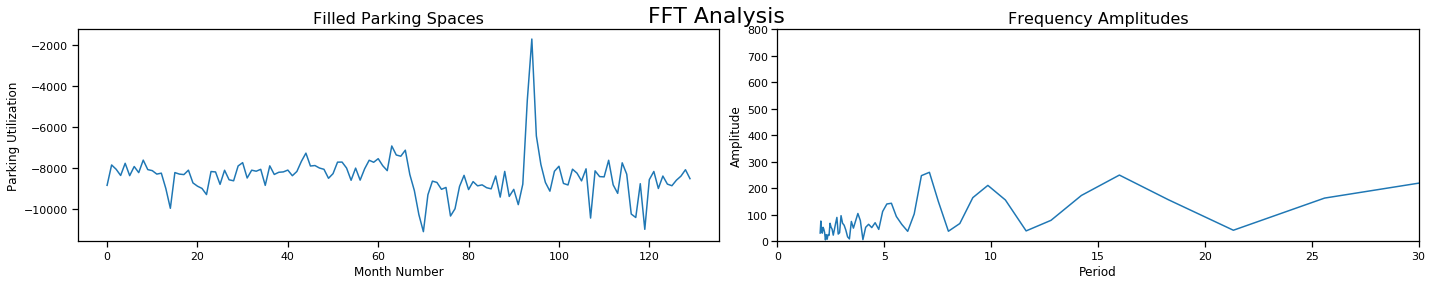

,freq,fft,amp
period,,,
42.666667,0.023438,1226.334441-19350.466389j,298.296721
64.000000,0.015625,-7770.450537+15196.513734j,262.583402
7.111111,0.140625,15338.354070-7166.281068j,260.459626
16.000000,0.062500,8516.005973+13843.453159j,250.047831
6.736842,0.148438,-9812.781131+12782.591390j,247.919302
32.000000,0.031250,10385.894474+12078.011435j,245.067393
9.846154,0.101562,-10391.630636-8960.473563j,211.098044
14.222222,0.070312,-10736.512579-3353.384217j,173.046416
9.142857,0.109375,10640.941906-1264.154106j,164.858003


In [71]:
def fft(s, N=None, T=1):

    import scipy.fftpack
    from scipy.signal.windows import hann
    
    if N is None:
        N = len(s)
    
    s = s * hann(len(s))
    
    yf = scipy.fftpack.fft(s)[:N//2]
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
    amp = 2.0/N * np.abs(yf)
    
    df =   pd.DataFrame({'freq':xf, 'fft': yf, 'amp':amp})
    df['period'] = df.freq.rtruediv(1.0).replace([np.inf, -np.inf], np.nan)
    
    return df

def plot_fft(x,y,f):

    fig, ax = plt.subplots(1,2, figsize=(20,4))
    ax = ax.flat

    fig.suptitle('FFT Analysis', fontsize=22)
    ax[0].plot(x,y)
    ax[0].set_xlabel("Month Number")
    ax[0].set_ylabel("Parking Utilization")
    ax[0].set_title('Filled Parking Spaces', fontsize=16)

    ax[1].set_xlim(0,30)
    ax[1].set_ylim(0,800)
    ax[1].plot(f.period, f.amp )
    ax[1].set_xlabel("Period")
    ax[1].set_ylabel("Amplitude")
    ax[1].set_title('Frequency Amplitudes', fontsize=16)

    plt.tight_layout()

    plt.show()

def sort_amp(y, f):
    t = f[f.period < len(y)/2].dropna().copy()
    #t['period'] = f.period.round()
    t = t.groupby('period').sum().sort_values('amp', ascending=False)
    return t

t = neighborhood[['time','out']].set_index('time').groupby(pd.Grouper(freq="D")).sum().iloc[20:150]

x = t.reset_index().index.values
y = t['out'].values

f = fft(y)

plot_fft(x,y,f)
    
display(HTML("<h2>Highest Apmplitude Periods"))


display(sort_amp(y, f).head(10))

In [58]:
t

,cs_norm
time,
2018-09-21,185113
2018-09-22,184862
2018-09-23,189494
2018-09-24,190977
2018-09-25,184476
...,...
2019-01-24,194343
2019-01-25,192862
2019-01-26,193416
